,process,parent,UID,process_occurrences,fragmented
datetime,,,,,
2024-03-08 23:04:10,ps(29622),bash(29621),0,1,0
2024-03-08 23:04:10,kworker/0:1(9410),kthreadd(2),0,3,0
2024-03-08 23:04:10,ps(33048),bash(33047),0,1,0
2024-03-08 23:06:10,ps(29622),bash(29621),0,1,0
2024-03-08 23:06:10,kworker/0:1(9410),kthreadd(2),0,3,0
...,...,...,...,...,...
2024-03-13 16:50:10,ps(2683310),bash(2683309),0,1,0
2024-03-13 16:50:10,kworker/0:2(3960584),kthreadd(2),0,1,0
2024-03-13 16:50:10,kworker/0:2(2892563),kthreadd(2),0,1,0


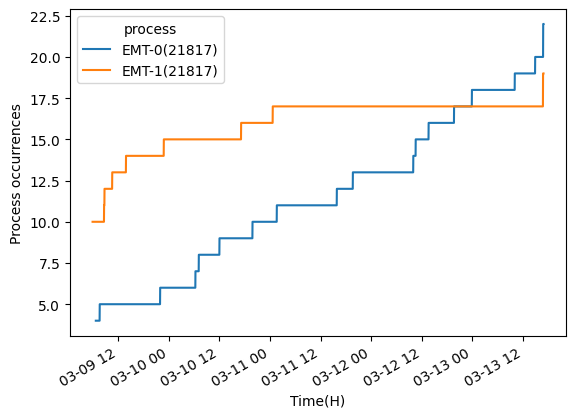

In [68]:
import pandas as pd

def ler_csv():
  return pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fragmentation.csv", delimiter=";")


""" Atribuir datetime64 para a coluna datetime do arquivo

    - transformar tipo datetime objeto para datetime64[ns]
"""
def converter_coluna_datetime_para_datetime64(data_frame):
  data_frame['datetime'] = pd.to_datetime(data_frame['datetime'])


def setar_index_como_datetime64(data_frame):
  return data_frame.set_index('datetime')


def total_segundos_inicial_final(data_frame):
  tempo_total_segundos = data_frame.index[-1] - data_frame.index[0]

  tempo_passado = tempo_total_segundos.total_seconds() / 3600

  print(tempo_passado)

  data_frame['time_passed'] = tempo_passado

  return data_frame.set_index(data_frame['time_passed'])


def data_frame_filtrado(data_frame, ocorrencia_minima_processos):
  return data_frame[data_frame['process_occurrences'] >= ocorrencia_minima_processos]


def pivot_data_frame(data_frame_filtrado):
  data_frame_pivot = data_frame_filtrado.pivot(columns='process', values='process_occurrences')
  ax = data_frame_pivot.plot(ylabel='Process occurrences', xlabel='Time(H)')

  return ax


def informar_tipo_dados_data_frame(data_frame):
  data_frame.info()

data_frame = ler_csv()


converter_coluna_datetime_para_datetime64(data_frame=data_frame)

data_frame = setar_index_como_datetime64(data_frame)

# data_frame = total_segundos_inicial_final(data_frame)

df_filt = data_frame_filtrado(data_frame, 4)

# pivot_data_frame(df_filt)

df_pivot = df_filt.pivot(columns='process', values='process_occurrences')
ax = df_pivot.plot(ylabel='Process occurrences', xlabel='Time(H)')


# informar_tipo_dados_data_frame(data_frame)
data_frame
